## LDA 
### Mini Balanced Set

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [22]:
dataset = np.load('BalancedFeatures.npz')
features = dataset['features']
labels = dataset['labels']

In [3]:
features= features.reshape([len(features),60*1722])
np.shape(features)


(1930, 103320)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [10]:
clf = LDA()
clf.fit(X_train, y_train)

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy = clf.score(X_test,y_test)

In [13]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6321243523316062


In [14]:
uniqueLabels = ['Bach', 'Brahms', 'Mozart','Schubert']
unique_categories = uniqueLabels
unique_categories

['Bach', 'Brahms', 'Mozart', 'Schubert']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20,10))
plt.imshow(cm, interpolation='nearest', cmap='coolwarm')
plt.title('Confusion Matrix \n QDA-4class, input=Mel-Frequency Spectrogram')
plt.colorbar()
tick_marks = np.arange(len(unique_categories))
plt.xticks(tick_marks, unique_categories, rotation=90)
plt.yticks(tick_marks, unique_categories)
plt.figure(figsize=(20,20))
# plt.savefig('_cm.png')
plt.show()

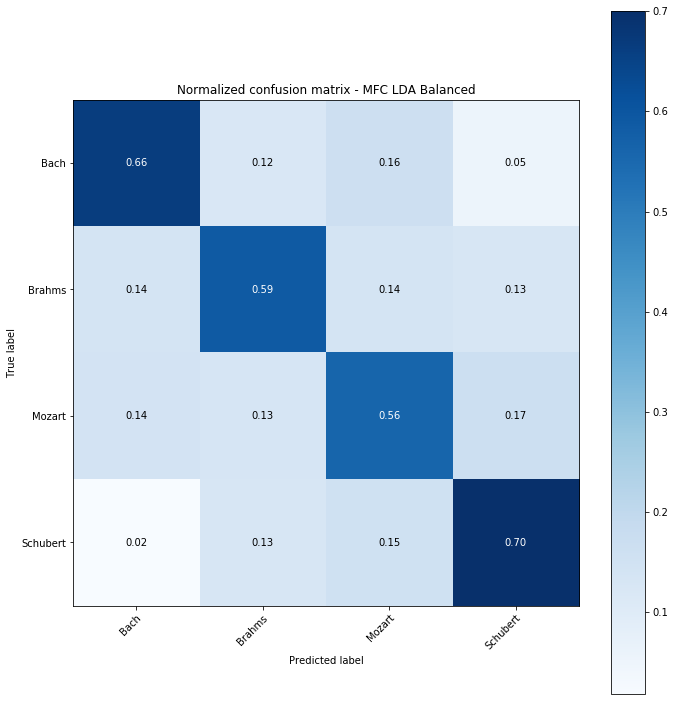

In [20]:
# #Error Analysis: Confusion Matrix
# plt.figure(figsize=(20,10))
# cm = confusion_matrix(y_test, y_pred)
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plt.figure(figsize=(20,10))
# plt.imshow(cm, interpolation='nearest', cmap='coolwarm')
# plt.title('Normalized Confusion Matrix \n QDA-4 Class, input=Mel-Frequency Spectrogram')
# plt.colorbar()
# tick_marks = np.arange(len(unique_categories))
# plt.xticks(tick_marks, unique_categories, rotation=90)
# plt.yticks(tick_marks, unique_categories)
# # plt.savefig('VGG16_input_melspec&deltas_Ncm.png')
# plt.show()
# unique_categories = np.unique(allLabels)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=unique_categories,
                      title='Normalized confusion matrix - MFC LDA Balanced')

plt.show()

In [16]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [classes[i] for i in unique_labels(y_true, y_pred)]
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax